In [28]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets import mnist
import numpy as np


In [61]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

In [62]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 8)           0         
__________

In [63]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [64]:
from tensorflow.python.keras.utils.vis_utils import plot_model

In [65]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [66]:
#モデルの描画
plot_model(autoencoder, to_file="architecture.png", show_shapes=True)

In [67]:
from PIL import Image

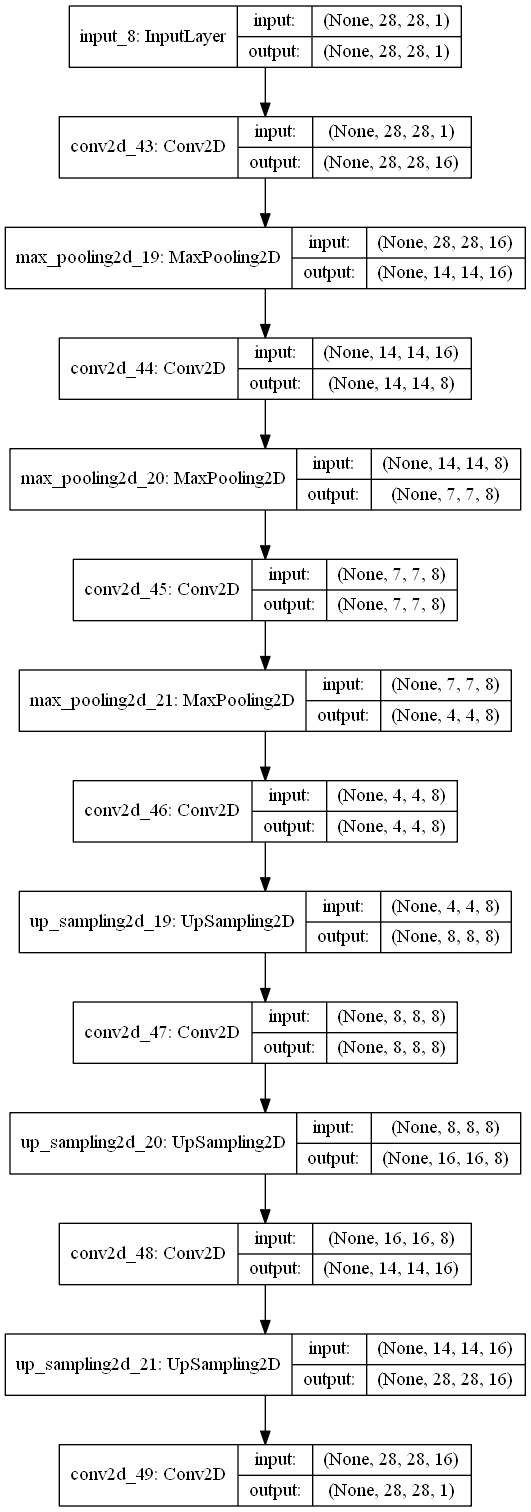

In [68]:
img = Image.open("architecture.png")
img

In [73]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)
x_train = np.reshape(x_train, (len(x_train), 28, 28,1))
x_test = np.reshape(x_test, (len(x_test), 28, 28,1))
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [91]:
import keras
log_filepath = "./logs/"
tb_cb = keras.callbacks.TensorBoard(log_dir=log_filepath, histogram_freq=1, write_graph=True, write_images=True)

In [92]:
autoencoder.fit(x_train, x_train,
                       nb_epoch=50,
                       batch_size=128,
                       shuffle=True,
                       callbacks=[tb_cb],
                       validation_data=(x_test, x_test),)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 81s 1ms/step - loss: 0.0915 - val_loss: 0.0904
Epoch 2/50
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0914 - val_loss: 0.0901
Epoch 3/50
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0913 - val_loss: 0.0909
Epoch 4/50
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0912 - val_loss: 0.0902
Epoch 5/50
60000/60000 [==============================] - 84s 1ms/step - loss: 0.0912 - val_loss: 0.0897
Epoch 6/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0910 - val_loss: 0.0899
Epoch 7/50
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0909 - val_loss: 0.0899
Epoch 8/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0909 - val_loss: 0.0898
Epoch 9/50
60000/60000 [==============================] - 83s 1ms/step - loss: 0.0908 - val_loss: 0.0895
Epoch

In [101]:
import matplotlib.pyplot as plt

# テスト画像を変換
decoded_imgs = autoencoder.predict(x_test)
print(decoded_imgs.shape)

(10000, 28, 28, 1)


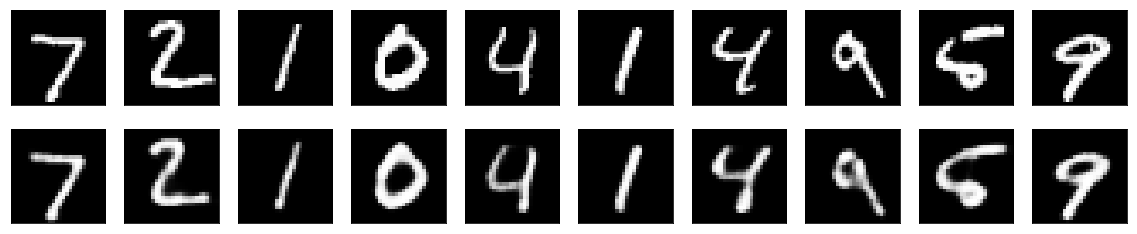

In [94]:
# 何個表示するか
# plt.subplot(行数, 列数, 何番目のプロットか)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナルのテスト画像を表示
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 変換された画像を表示
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)  #軸の値の表示を無効化
    ax.get_yaxis().set_visible(False)  #軸の値の表示を無効化
plt.show()

# エンコードされた画像も可視化してみましょう。(8, 4, 4) という形

In [117]:
import matplotlib.pyplot as plt

n = 20
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test[:n])
print(encoded_imgs.shape)

(20, 4, 4, 8)


エンコードされた画像は、このように人間には認識できない画像になっている。
Matplotlibはデフォルトでは補完して出力するようになっているが、4x4の解像度が低い画像は生の値で出力した方が良い
interpolation='none'と指定

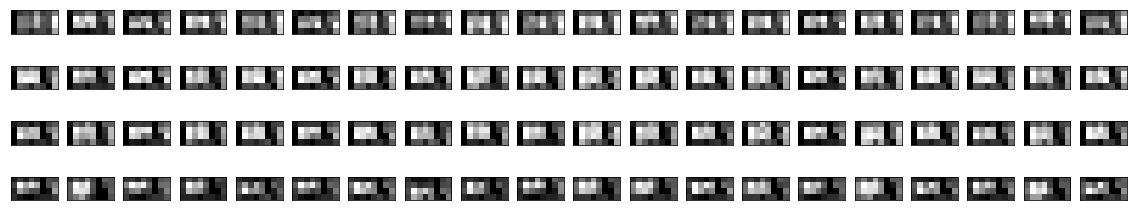

In [128]:
plt.figure(figsize=(20, 8))
for i in range(n):
    for j in range(4):
        ax = plt.subplot(8, n, j*n + i+1)
        plt.imshow(encoded_imgs[i][j], interpolation='none')
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        